#                  Telecom Customer Churn Analysis. 


<img src="https://storage.googleapis.com/kaggle-datasets-images/2321135/3907949/b0bdc9ae114288b030a4c2a74ae4a939/dataset-cover.png?t=2022-07-09-07-22-29"/>

**ABOUT THE DATA.**

The Customer Churn table contains information on all 7,043 customers from a Telecommunications company in California in Q2 2022
Each record represents one customer, and contains details about their demographics, location, tenure, subscription services, status for the quarter (joined, stayed, or churned), and more!

**Data Collection Methodology**

The public dataset is completely available on the Maven Analytics website platform where it stores and consolidates all available datasets for analysis in the Data Playground. The specific telecom customer churn dataset at hand can be obtained in this link below: https://www.mavenanalytics.io/blog/maven-churn-challenge, also on Kaggle @:https://www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics.


**OBJECTIVES:**

*Why customers churn? (Descriptive statistics)*

*What are factors that affect customer churn? (Inferential statistics)*


## Import neccessary packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
pd.set_option('display.max_columns', None)

In [2]:
# Reading dataset.
df = pd.read_csv('../telecom_customer_churn.csv')
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,NaN,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,NaN,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,NaN,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


## DATA EXLORATION.

In [3]:
print('The data consist of '+str(df.shape[0])+ ' rows and '+str(df.shape[1])+' columns')

The data consist of 7043 rows and 38 columns


#### Dropping joined observations fromthe dataset.

In [4]:
df = df.drop(df[df['Customer Status'] == 'Joined'].index, axis=0)
df.shape

(6589, 38)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6589 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6589 non-null   object 
 1   Gender                             6589 non-null   object 
 2   Age                                6589 non-null   int64  
 3   Married                            6589 non-null   object 
 4   Number of Dependents               6589 non-null   int64  
 5   City                               6589 non-null   object 
 6   Zip Code                           6589 non-null   int64  
 7   Latitude                           6589 non-null   float64
 8   Longitude                          6589 non-null   float64
 9   Number of Referrals                6589 non-null   int64  
 10  Tenure in Months                   6589 non-null   int64  
 11  Offer                              2991 non-null   object 
 1

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6589.0,46.760510,16.841362,19.000000,33.000000,46.000000,60.000000,80.000000
Number of Dependents,6589.0,0.476097,0.968499,0.000000,0.000000,0.000000,0.000000,9.000000
Zip Code,6589.0,93491.504477,1857.575392,90001.000000,92103.000000,93526.000000,95333.000000,96150.000000
Latitude,6589.0,36.199761,2.472459,32.555828,33.989524,36.245926,38.169605,41.962127
Longitude,6589.0,-119.757670,2.155696,-124.301372,-121.788090,-119.601370,-117.967399,-114.192901
Number of Referrals,6589.0,2.020944,3.024016,0.000000,0.000000,0.000000,3.000000,11.000000
Tenure in Months,6589.0,34.499772,23.968734,1.000000,12.000000,32.000000,57.000000,72.000000
Avg Monthly Long Distance Charges,5945.0,25.496246,14.198424,1.010000,13.140000,25.720000,37.690000,49.990000
Avg Monthly GB Download,5245.0,26.225929,19.565724,2.000000,13.000000,21.000000,30.000000,85.000000
Monthly Charge,6589.0,65.030695,31.100727,-10.000000,35.800000,71.050000,90.400000,118.750000


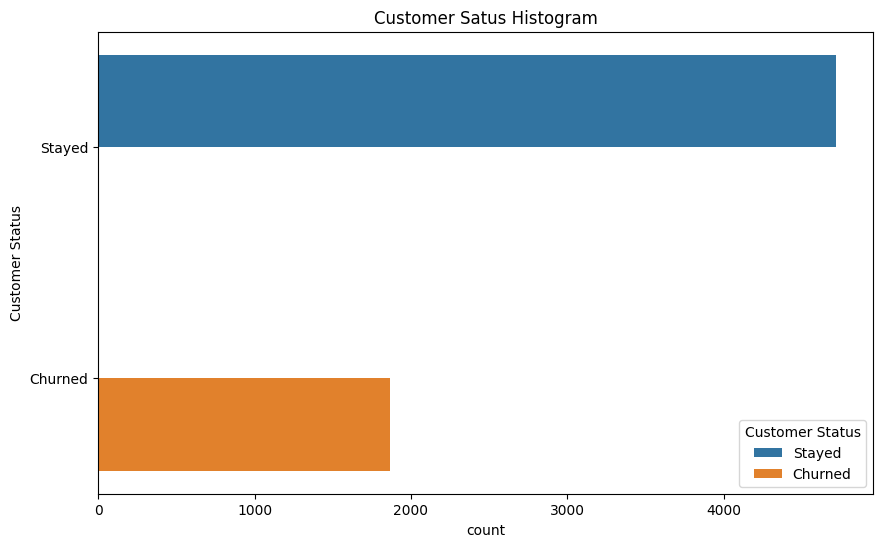

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Customer Status', hue='Customer Status')
plt.title('Customer Satus Histogram')
plt.show()

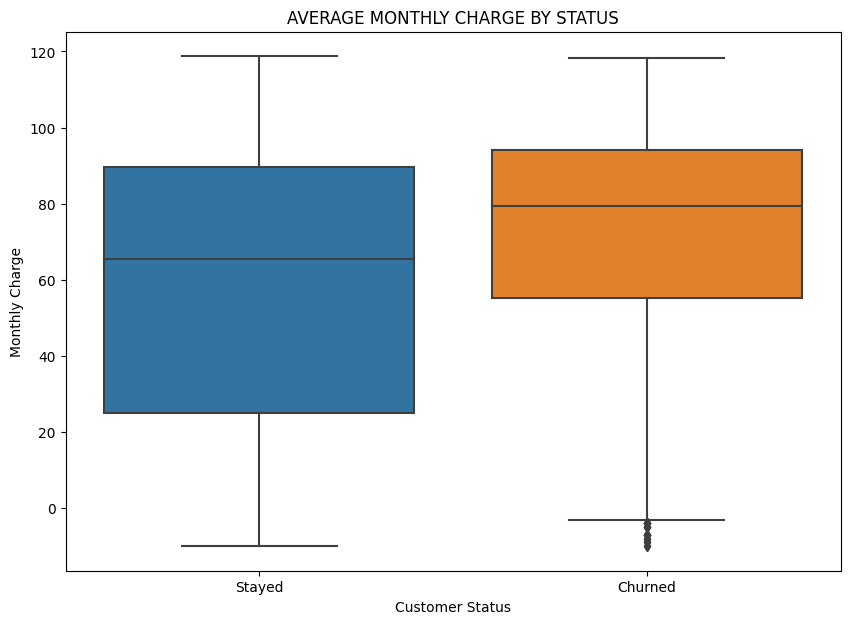

In [8]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, y='Monthly Charge', x='Customer Status')
plt.title('AVERAGE MONTHLY CHARGE BY STATUS')
plt.show()

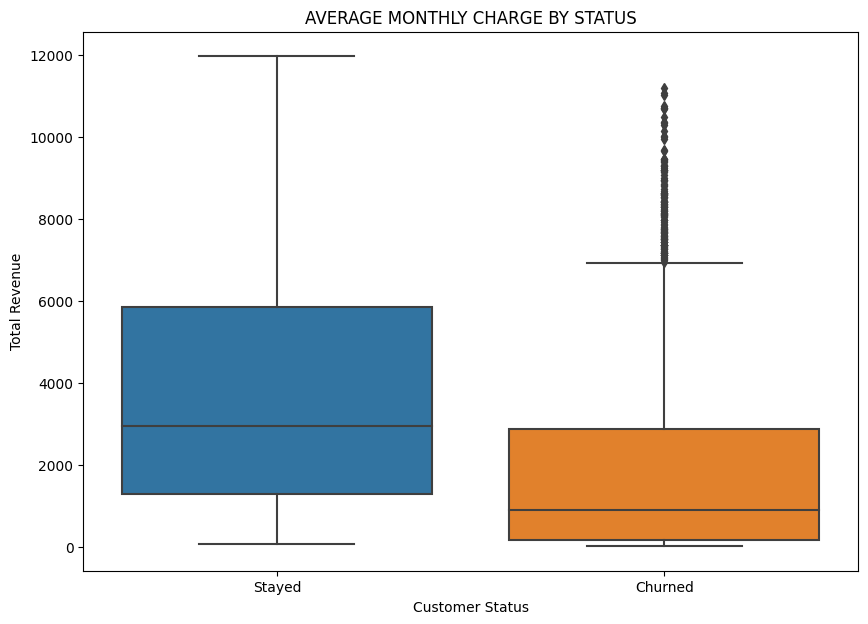

In [9]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, y='Total Revenue', x='Customer Status')
plt.title('AVERAGE MONTHLY CHARGE BY STATUS')
plt.show()

## Data Cleaning and Validation.

In [10]:
def resolve_dtype(df):
    for col in df.columns:
        if df[col].dtypes == 'int64':
            df[col] = df[col].astype('int32')
        elif df[col].dtypes == 'float64':
            df[col] = df[col].astype('float32')
        else:
            df[col] = df[col].astype('category')
        
    return df




In [11]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [12]:
columns = ['Gender','Age', 'Tenure in Months', 'Offer', 'Number of Dependents', 'Number of Referrals','Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Unlimited Data',
       'Streaming Music', 'Unlimited Data', 'Contract',
       'Payment Method', 'Monthly Charge', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason']

df = df[columns].copy()

In [13]:
df.isnull().sum()

Gender                            0
Age                               0
Tenure in Months                  0
Offer                          3598
Number of Dependents              0
Number of Referrals               0
Multiple Lines                  644
Internet Service                  0
Internet Type                  1344
Online Security                1344
Device Protection Plan         1344
Premium Tech Support           1344
Streaming TV                   1344
Streaming Movies               1344
Unlimited Data                 1344
Streaming Music                1344
Unlimited Data                 1344
Contract                          0
Payment Method                    0
Monthly Charge                    0
Total Refunds                     0
Total Extra Data Charges          0
Total Long Distance Charges       0
Total Revenue                     0
Customer Status                   0
Churn Category                 4720
Churn Reason                   4720
dtype: int64

In [14]:
df.fillna('mising', inplace=True)

df.isnull().sum().any()

False

In [15]:
df = resolve_dtype(df)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
catcols = df.select_dtypes('category').columns

category_entry = {}
for col in catcols:
    print({col : df[col].unique().tolist()})

{'Gender': ['Female', 'Male']}
{'Offer': ['mising', 'Offer E', 'Offer D', 'Offer A', 'Offer B', 'Offer C']}
{'Phone Service': ['Yes', 'No']}
{'Multiple Lines': ['No', 'Yes', 'mising']}
{'Internet Service': ['Yes', 'No']}
{'Internet Type': ['Cable', 'Fiber Optic', 'DSL', 'mising']}
{'Online Security': ['No', 'Yes', 'mising']}
{'Device Protection Plan': ['No', 'Yes', 'mising']}
{'Premium Tech Support': ['Yes', 'No', 'mising']}
{'Streaming TV': ['Yes', 'No', 'mising']}
{'Streaming Movies': ['No', 'Yes', 'mising']}
{'Streaming Music': ['No', 'Yes', 'mising']}
{'Unlimited Data': ['Yes', 'No', 'mising']}
{'Contract': ['One Year', 'Month-to-Month', 'Two Year']}
{'Payment Method': ['Credit Card', 'Bank Withdrawal', 'Mailed Check']}
{'Customer Status': ['Stayed', 'Churned']}
{'Churn Category': ['mising', 'Competitor', 'Dissatisfaction', 'Other', 'Price', 'Attitude']}
{'Churn Reason': ['mising', 'Competitor had better devices', 'Product dissatisfaction', 'Network reliability', 'Limited range of 

## Data Analysis.

**1. Exploring why customer churn.** 

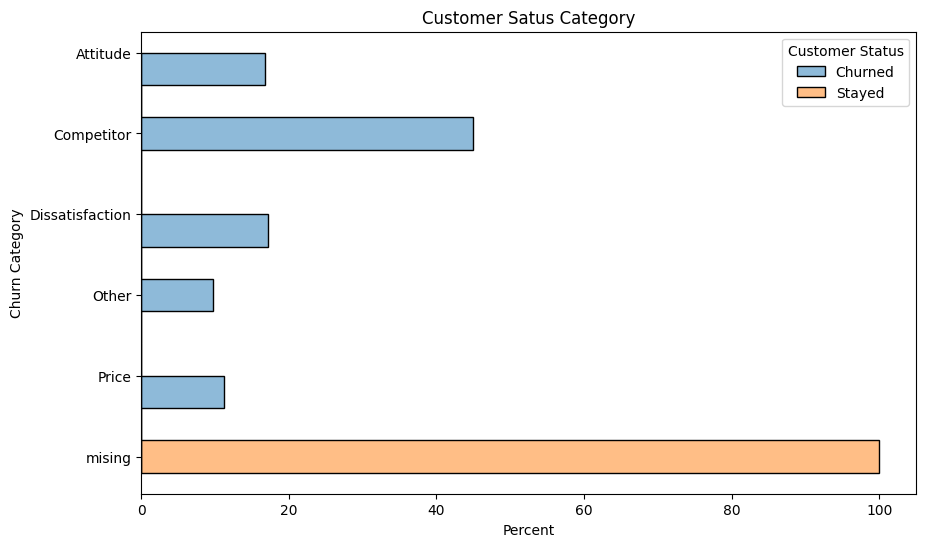

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, hue='Customer Status', y='Churn Category',  stat='percent', discrete=False, binwidth=0.4, common_norm=False)
plt.title('Customer Satus Category')
plt.show()

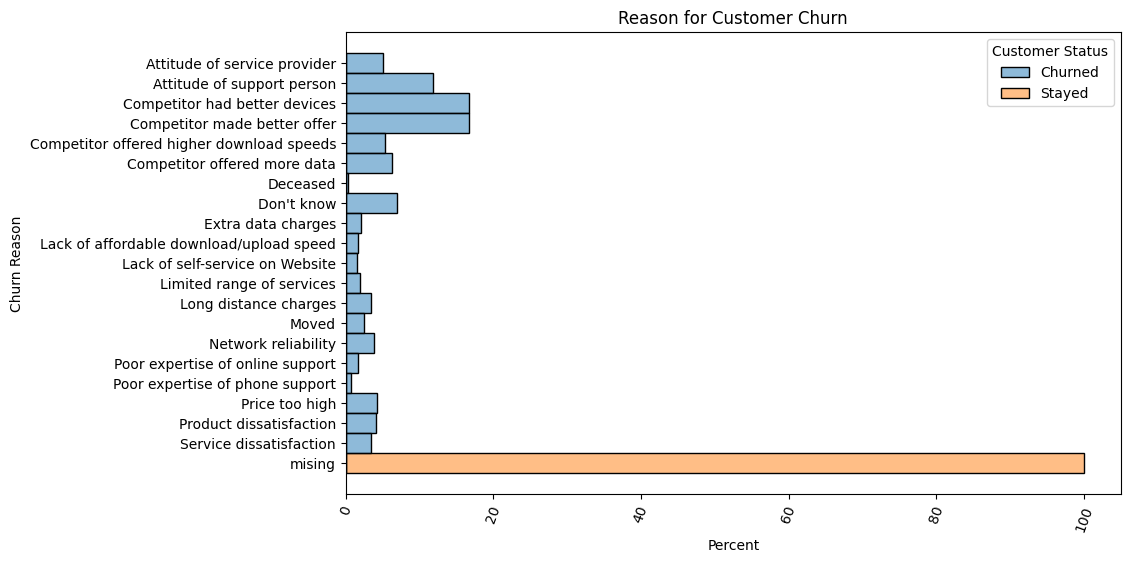

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, y='Churn Reason', hue='Customer Status', stat='percent', common_norm=False)
plt.title('Reason for Customer Churn')
plt.xticks(rotation=70)
plt.show()

The top customer category that churn is competitor with more than 40 %, while dissatfation and atttude are about 20% 

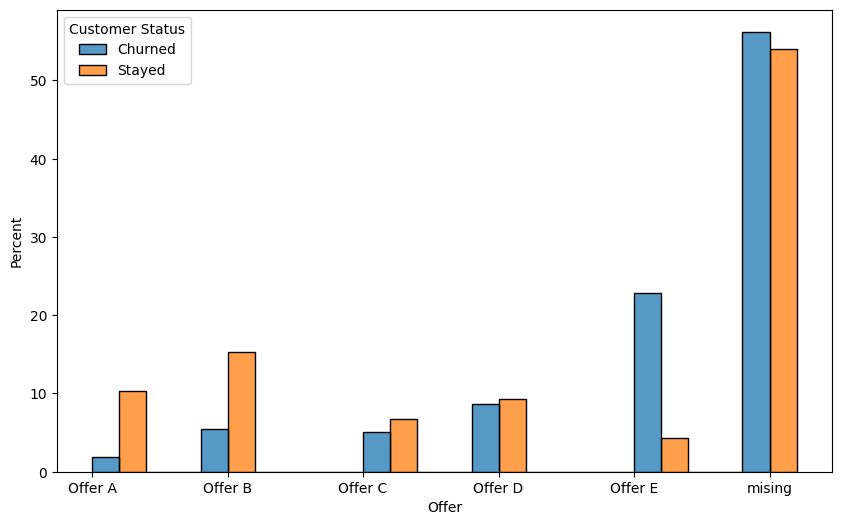

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Offer', hue='Customer Status', multiple='dodge', stat='percent', discrete=False, binwidth=0.4, common_norm=False)
plt.show()

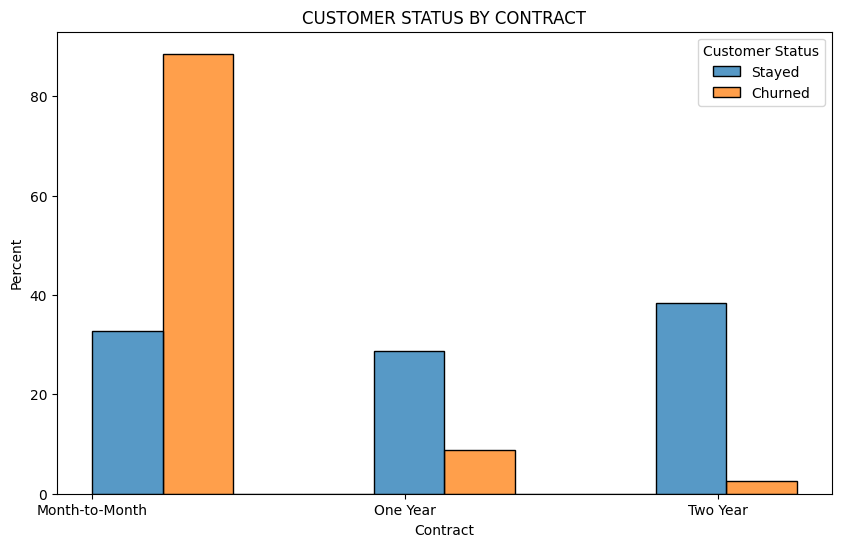

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Contract', hue='Customer Status', multiple='dodge', stat='percent', discrete=False, binwidth=0.45, common_norm=False, hue_order=['Stayed', 'Churned'])
plt.title('CUSTOMER STATUS BY CONTRACT')
plt.show()

**Insght:** Here is an evident that customer with monthly contract tend to churn more than annual or bi-annual contract.

We need to look further in other factors that can lead to churn in monthly contract cutomers such as payment method, teure of subcrption in months.

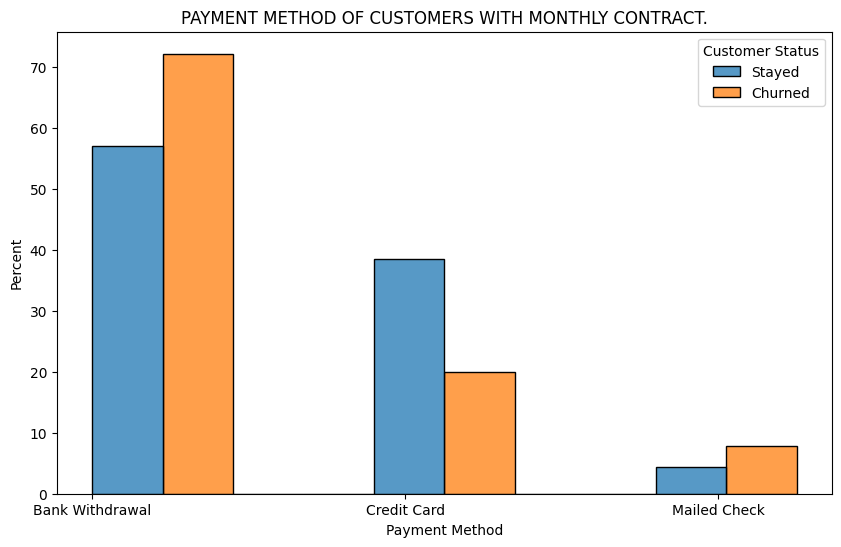

In [ ]:
m2m = df[df['Contract'] == 'Month-to-Month']
plt.figure(figsize=(10,6))
sns.histplot(data=m2m, x='Payment Method', hue='Customer Status', multiple='dodge', discrete=False, binwidth=0.45, stat='percent', common_norm=False, hue_order=['Stayed', 'Churned'])
plt.title('PAYMENT METHOD OF CUSTOMERS WITH MONTHLY CONTRACT.')
plt.show()

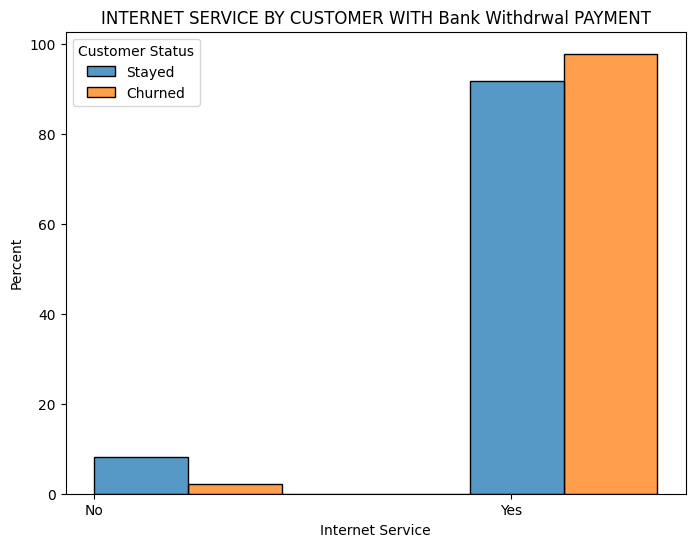

In [ ]:
card = m2m[m2m['Payment Method'] == 'Bank Withdrawal']

plt.figure(figsize=(8,6))
sns.histplot(data=card, x='Internet Service', hue='Customer Status', multiple='dodge', discrete=False, binwidth=0.45, hue_order=['Stayed', 'Churned'], stat='percent', common_norm=False)
plt.title('INTERNET SERVICE BY CUSTOMER WITH Bank Withdrwal PAYMENT')
plt.show()

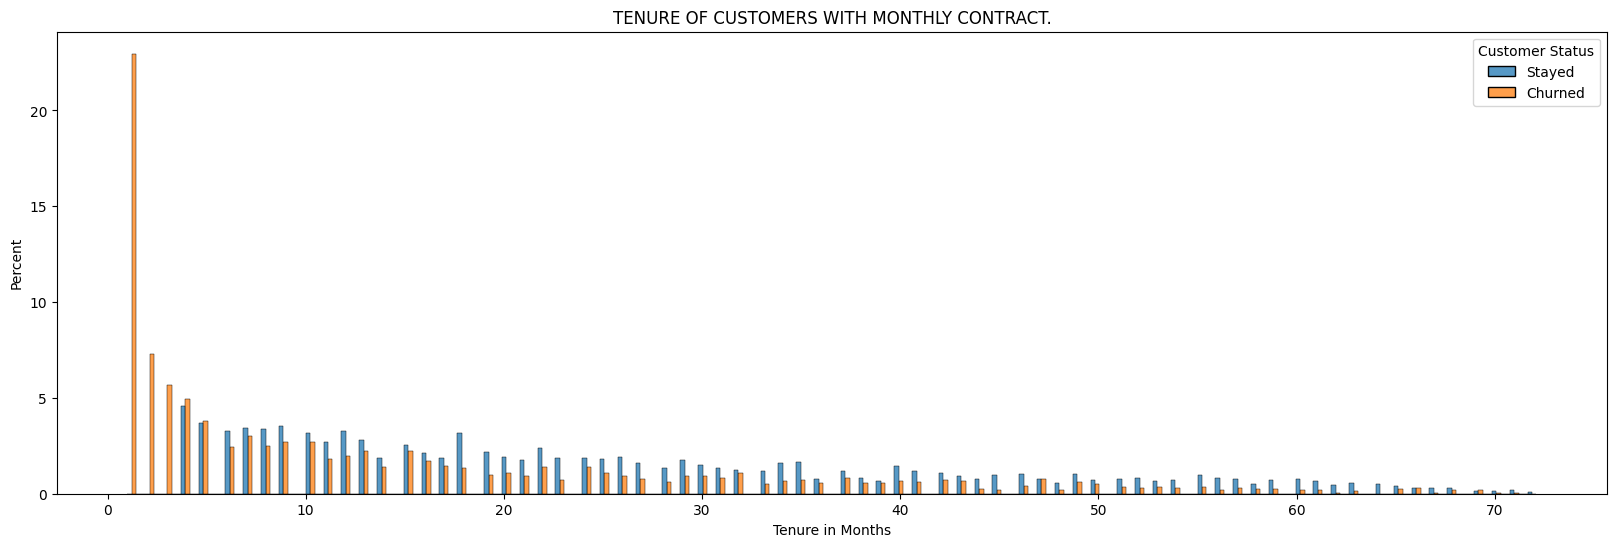

In [ ]:
m2m = df[df['Contract'] == 'Month-to-Month']
plt.figure(figsize=(20,6))
sns.histplot(data=m2m, x='Tenure in Months', hue='Customer Status', multiple='dodge', discrete=False, binwidth=0.45, stat='percent', common_norm=False, hue_order=['Stayed', 'Churned'])
plt.title('TENURE OF CUSTOMERS WITH MONTHLY CONTRACT.')
plt.show()

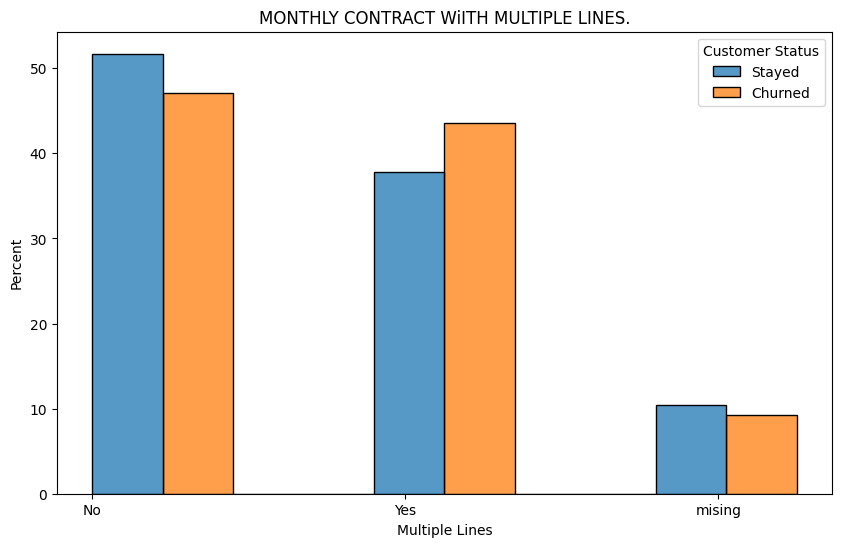

In [ ]:
m2m = df[df['Contract'] == 'Month-to-Month']
plt.figure(figsize=(10,6))
sns.histplot(data=m2m, x='Multiple Lines', hue='Customer Status', multiple='dodge', discrete=False, binwidth=0.45, stat='percent', common_norm=False, hue_order=['Stayed', 'Churned'])
plt.title('MONTHLY CONTRACT WiITH MULTIPLE LINES.')
plt.show()

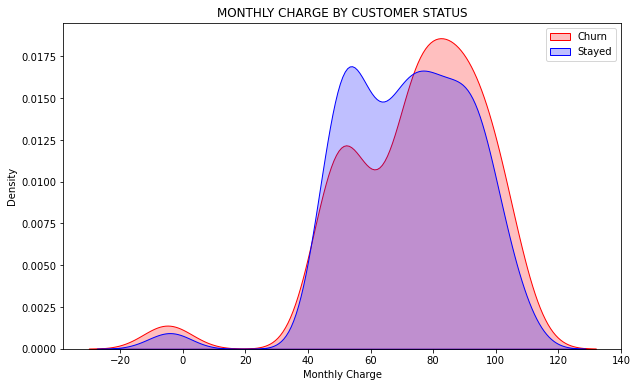

In [ ]:
churn_cd = card.groupby(['Customer Status']).get_group('Churned')
stayed_cd = card.groupby(['Customer Status']).get_group('Stayed')

plt.figure(figsize=(10,6))
sns.kdeplot(churn_cd['Monthly Charge'], color='red', shade=True)
sns.kdeplot(stayed_cd['Monthly Charge'], color='blue', shade=True)
plt.title('MONTHLY CHARGE BY CUSTOMER STATUS')
plt.legend(['Churn', 'Stayed'])
plt.ion()

Customer churn are more likely to increase as *Monthly Charge* increases, which cause customer to switch service provider.

Another factor to consider from the above insight is service quality and reliability.

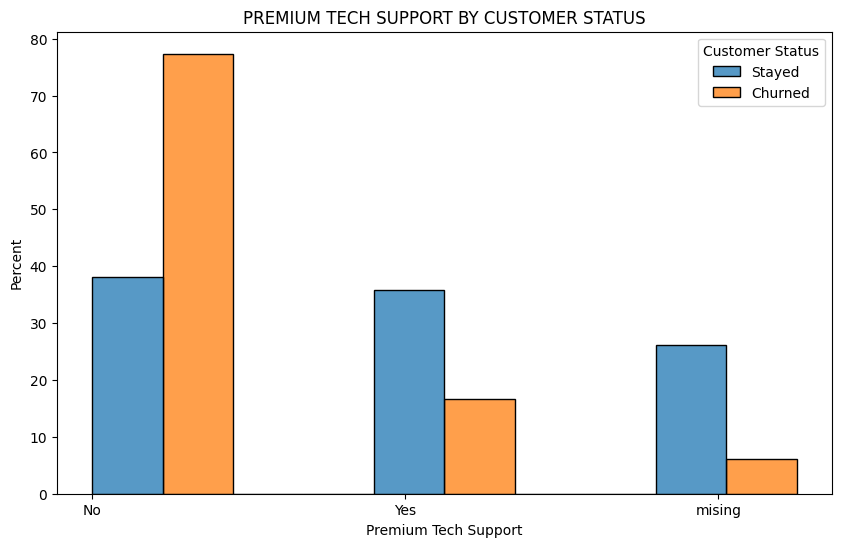

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Premium Tech Support', hue='Customer Status', multiple='dodge', discrete=False, binwidth=0.45, stat='percent', hue_order=['Stayed', 'Churned'], common_norm=False)
plt.title('PREMIUM TECH SUPPORT BY CUSTOMER STATUS')
plt.show()

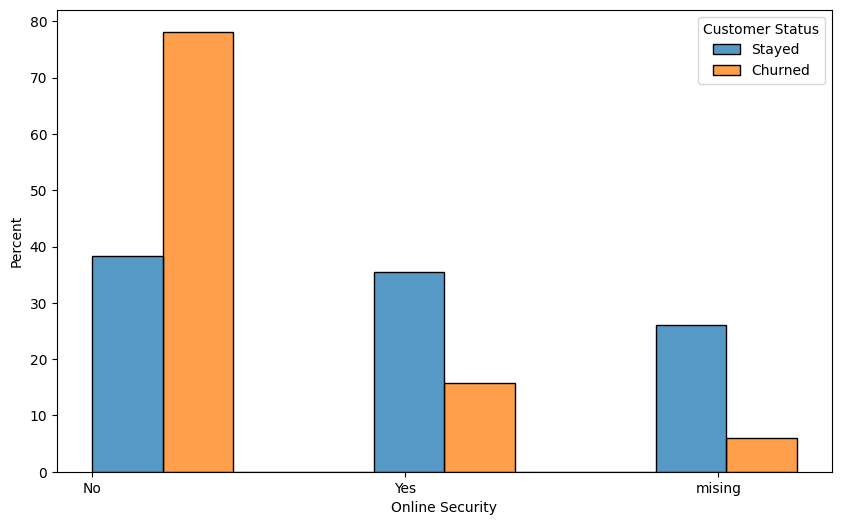

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Online Security', hue='Customer Status', multiple='dodge', discrete=False, binwidth=0.45, stat='percent', common_norm=False, hue_order=['Stayed', 'Churned'])
plt.show()

**Key Insights**

The factors that contribute to customer churn are:

* Contract type-> customers with month-to-month contract are ~90% of the churned customers with more than 40% hhaving les than 10 month tenure.

* Monthly Charge-> there is high churn rate at hight service charge.

* Preminm Tech Support-> customers with NO premium technology support such as stable network coverage has 80% of churned cutoers.

*  Online Security-> Approxomately 80 % of churn customers has n online security

**2. How to improve customer retention**



**Recommendations:**
* Provision suitable offers/plans of many varieties for customers retention.
  
* Investing in cutting edge technology and availability of service in both rural and urban environment.

* Improve in online security, which will make customer reliable in term of their privacy.

* Innovation of mobile payment platform for customer to subcribe on the go.

In [ ]:
df.to_csv('customer-churn-cleaned.csv', index=False)

**Conclusion:**

There is need for futher analysis to provide more solution to the problem by acquiring more data.

The data can also be use to make predictive analysis in order to give decision makers features to focus on  for in order to identify customer thatare liable to churning..